In [481]:
from molmap import loadmap

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
import numpy as np


mp1 = loadmap('./descriptor_grid_split.mp')
mp2 = loadmap('./fingerprint_grid_split.mp')

aspirin = 'CC(=O)OC1=CC=CC=C1C(O)=O' #aspirin
NAC = 'CC(=O)NC1=CC=CC=C1C(O)=O' #N_acetylanthranilic_acid

smiles_list = [aspirin, NAC]

In [482]:
aspirin_mol = Chem.MolFromSmiles(aspirin)
NAC_mol = Chem.MolFromSmiles(NAC)

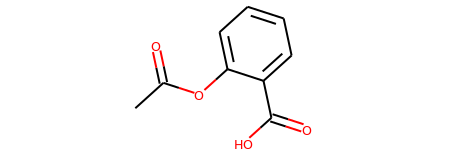

In [483]:
aspirin_mol

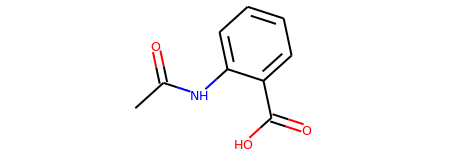

In [484]:
NAC_mol

In [485]:
aspirin_X1 = mp1.transform(aspirin)
aspirin_X2 = mp2.transform(aspirin)

NAC_X1 = mp1.transform(NAC)
NAC_X2 = mp2.transform(NAC)

In [486]:
aspirin_X1.shape, aspirin_X2.shape

((37, 37, 13), (37, 36, 3))

In [487]:
def get_color_dict(mp):
    df = mp._S.df
    return df.set_index('Subtypes')['colors'].to_dict()


def show_fmap(mp, X, figsize=(6,6), fname = './1.pdf'):
    
    mp_colors = get_color_dict(mp)
    fig =  plt.figure(figsize=figsize)
    channels = mp._S.channels
                 
    for i, j  in enumerate(channels):
        data = X[:,:,i]
        color = mp_colors[j]
        if mp.ftype == 'fingerprint':
            cmap = sns.dark_palette(color, n_colors =  2, reverse=True)
        else:
            cmap = sns.light_palette(color, n_colors =  100, reverse=False)
        
        ax = sns.heatmap(np.where(data !=0, data, np.nan), 
                    cmap = cmap, 
                    yticklabels=False, xticklabels=False, cbar=False, 
                    linewidths=0.005, linecolor = '0.9')# cbar_kws = dict(use_gridspec=False,location="top")

    ax.axhline(y=0, color='grey',lw=2, ls =  '--')
    ax.axvline(x=data.shape[1], color='grey',lw=2, ls =  '--')
    ax.axhline(y=data.shape[0], color='grey',lw=2, ls =  '--')
    ax.axvline(x=0, color='grey',lw=2, ls =  '--')

    patches = [ plt.plot([],[], marker="s", ms=8, ls="", mec=None, color=j, 
                label=i)[0]  for i,j in mp_colors.items()]
    
    l = 1.32
    if mp.ftype == 'fingerprint':
        l += 0.05
    plt.legend(handles=patches, bbox_to_anchor=(l,1.01), 
               loc='upper right', ncol=1, facecolor="w", numpoints=1 )    
    
    #plt.tight_layout()
    plt.savefig(fname, bbox_inches='tight')

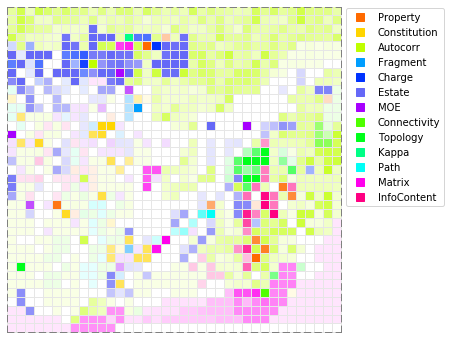

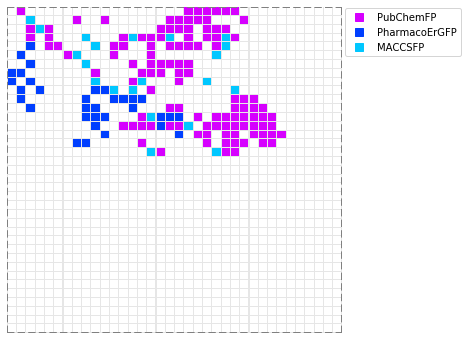

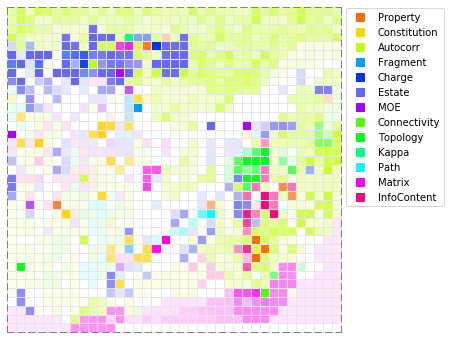

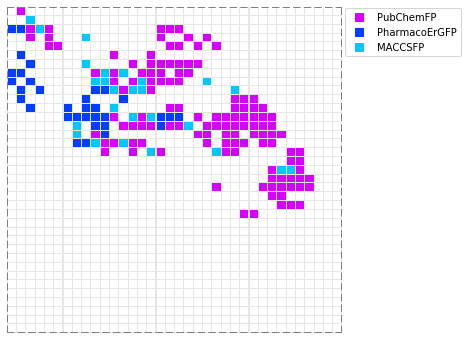

In [488]:
show_fmap(mp1, aspirin_X1, fname='./images/aspirin_X1.pdf') 
show_fmap(mp2, aspirin_X2, fname='./images/aspirin_X2.pdf') 

show_fmap(mp1, NAC_X1, fname='./images/NAC_X1.pdf') 
show_fmap(mp2, NAC_X2, fname='./images/NAC_X2.pdf') 

In [555]:
def show_fmap2(mp, X, figsize=(7*13, 6), fname = './1.pdf'):
    
    mp_colors = get_color_dict(mp)
    channels = mp._S.channels
                
    fig, axes = plt.subplots(nrows= 1, ncols=len(channels), figsize=figsize)
    
    for i, j  in enumerate(channels):
        data = X[:,:,i]
        color = mp_colors[j]
        if mp.ftype == 'fingerprint':
            cmap = sns.dark_palette(color, n_colors =  2, reverse=True)
        else:
            cmap = sns.light_palette(color, n_colors =  100, reverse=False)
        
        ax = axes[i]
        sns.heatmap(np.where(data !=0, data, np.nan), 
                    cmap = cmap, ax = ax, #vmax = data.max()-0.01,
                    yticklabels=False, xticklabels=False, cbar=False,  #cbar_kws = dict(use_gridspec=False,location="bottom"), 
                    linewidths=0.005, linecolor = '0.9')#
        lw = 5
        c = 'k'
        ax.axhline(y=0, color=c,lw=lw, ls =  '-')
        ax.axvline(x=data.shape[1], color=c,lw=lw, ls =  '-')
        ax.axhline(y=data.shape[0], color=c,lw=lw, ls =  '-')
        ax.axvline(x=0, color=c,lw=lw, ls =  '-')
        ax.set_title(j)
    plt.savefig(fname, bbox_inches='tight')

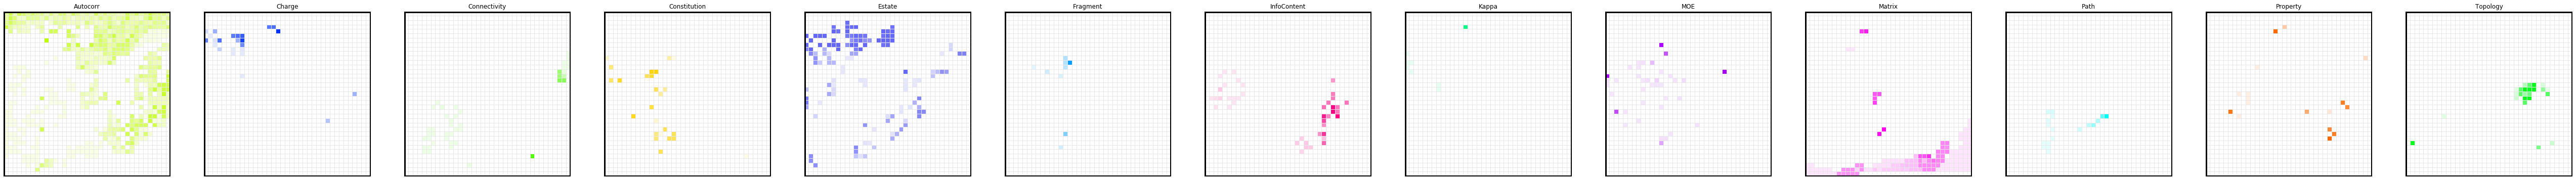

In [556]:
show_fmap2(mp1, aspirin_X1, fname = './images/1.pdf')

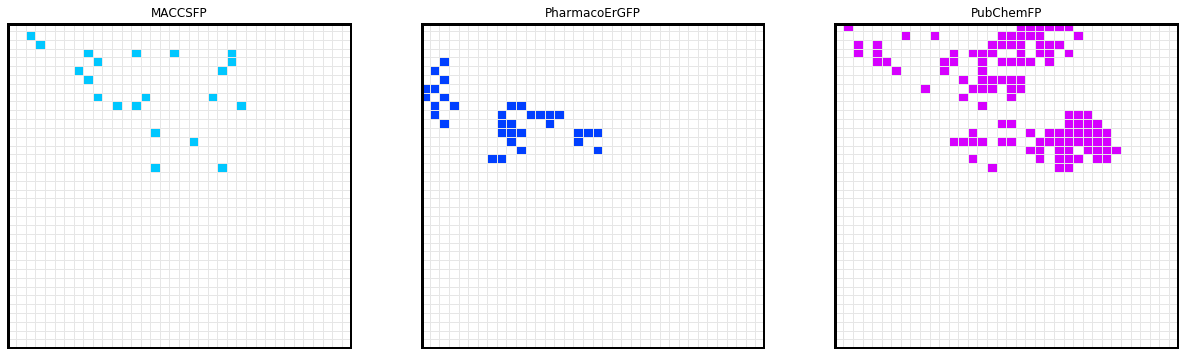

In [558]:
show_fmap2(mp2, aspirin_X2, fname = './images/2.pdf',figsize=(7*3, 6))